# Лабораторная работа №2. Дискретные LTI системы.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import matplotlib.ticker as ticker
import time

# Модуль 1. Линейная дискретная свертка.

Линейная дискретная свертка двух последовательностей отсчетов $x[k]$ и $h[k]$ определяется формулой 
$$y[k]=x[k]\otimes h[k] = \sum\limits_{m=-\infty }^{\infty }{x}[m]h[k-m].$$

Заметим, что если последовательности $x[k]$ и $h[k]$ каузальны, т.е. $x[k]\equiv 0$ и $h[k]\equiv 0$ при $k<0$, то 
$$y[k]= \sum\limits_{m=-\infty }^{\infty }{x}[m]h[k-m] = \sum\limits_{m=0 }^{k }{x}[m]h[k-m].$$

### Пример. Свертка прямоугольных окон.

Рассмотрим свертку двух одинаковых прямоугольных окон $w[k]$ длиной в $N=3$ отсчета

$$w[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}[k-m]}=\left\{ \begin{matrix}
   1, \text{ при } k\in[0, N-1],  \\
   0, \text{ при } k\notin[0, N-1].  \\
\end{matrix} \right.$$

$$y[k]= \sum\limits_{m=-\infty }^{\infty }{w}[m]w[k-m] = \sum\limits_{m=0 }^{k }{w}[m]w[k-m].$$
$$y[0]= \sum\limits_{m=-\infty }^{\infty } w[m]w[0-m] = w[0] \cdot w[0] =1$$
$$y[1]= \sum\limits_{m=-\infty }^{\infty } w[m]w[1-m] = w[0] \cdot w[1] + w[1] \cdot w[0]  =2$$
$$y[2]= \sum\limits_{m=-\infty }^{\infty } w[m]w[2-m] = w[0] \cdot w[2] + w[1] \cdot w[1] +  w[2] \cdot w[0] =3$$
$$ \cdots $$

In [3]:
x = np.array([1, 1, 1])
h = np.array([1, 1, 1])
y = signal.convolve(x, h)
y

array([1, 2, 3, 2, 1])

## scipy.signal.convolve

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

```scipy.signal.convolve(in1, in2, mode='full', method='auto')```

Convolve two N-dimensional arrays.

Convolve `in1` and `in2`, with the output size determined by the mode argument.

**Parameters**
* `in1` *array_like* First input.

* `in2` *array_like* Second input. Should have the same number of dimensions as `in1`.

* `mode` *str* {`full`, `valid`, `same`}, *optional* A string indicating the size of the output:

* * `full` The output is the full discrete linear convolution of the inputs. (Default)

* * `valid` The output consists only of those elements that do not rely on the zero-padding. In `valid` mode, either `in1` or `in2` must be at least as large as the other in every dimension.

* * `same` The output is the same size as in1, centered with respect to the `full` output.

* `method` *str* {`auto`, `direct`, `fft`}, *optional* A string indicating which method to use to calculate the convolution.

* * `direct` The convolution is determined directly from sums, the definition of convolution.

* * `fft` The Fourier Transform is used to perform the convolution by calling fftconvolve.

* * `auto` Automatically chooses direct or Fourier method based on an estimate of which is faster (default). New in version 0.19.0.

**Returns**

* `convolve` *array* An N-dimensional array containing a subset of the discrete linear convolution of `in1` with `in2`.

**Warns**
* `RuntimeWarning` Use of the FFT convolution on input containing NAN or INF will lead to the entire output being NAN or INF. Use method=`direct` when your input contains NAN or INF values.

## Вычисление выхода цифрового фильтра через свертку

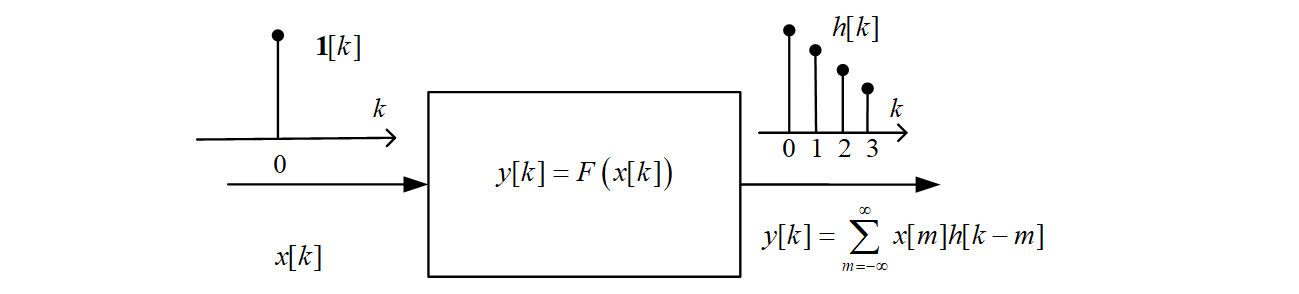

Выход LTI системы  может быть получен с помощью ее реакции на единичный импульс в нулевой момент времени  $\mathbf{1}[k]$ — импульсной характеристики $h[k]$. 
$$y[k]=\sum\limits_{m=-\infty }^{\infty }{x}[m]h[k-m].$$


Таким образом, выход LTI системы является дискретной сверткой входного воздействия с импульсной характеристикой.

*  Системы-фильтры, для которых импульсная характеристика $h[k]$ является финитная функция, называются фильтрами с конечной импульсной характеристикой (**КИХ - фильтрами**, в англоязычной литературе **FIR** - Finite impulse response filter). 

* Если импульсная характеристика $h[k]$ нефинитная функция, то такие системы называются фильтрами с бесконечной импульсной характеристикой (**БИХ - фильтрами**, в англоязычной литературе **IIR** - Infinite impulse response filter). 


### Пример 1

In [4]:
x = np.array([-2, 1, 2, -1])
h = np.array([-1, 1, 2])
y = signal.convolve(x, h)
y

array([ 2, -3, -5,  5,  3, -2])

In [6]:
%matplotlib widget

In [7]:
%matplotlib inline

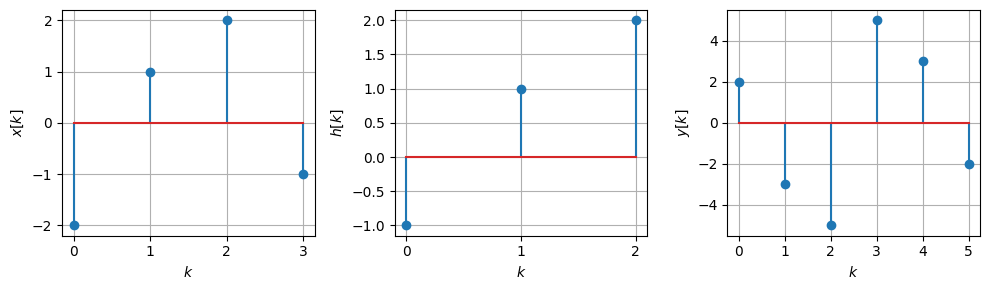

In [8]:
def plot_signal(signal, index, variable):
    ax = plt.subplot(1, 3, index)
    ax.stem(signal)
    ax.set_xlabel("$k$")
    ax.set_ylabel("$"+variable+"[k]$")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    ax.grid()

plt.figure(figsize=[10, 3])
plot_signal(x, index=1, variable='x')
plot_signal(h, index=2, variable='h')
plot_signal(y, index=3, variable='y')
plt.tight_layout()

Заметим, что если $x[k]$ и $h[k]$ — последовательности длиной $N_1$ и $N_2$ отсчетов, то число ненулевых отсчетов для их линейной дискретной свертки не превышает $N_1+N_2-1$.

### Пример 2. Свертка прямоугольных окон

Вычислить линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], \;\; M=3$$
непоследственно воспользовавшись формулой линейной дискретной свертки 
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

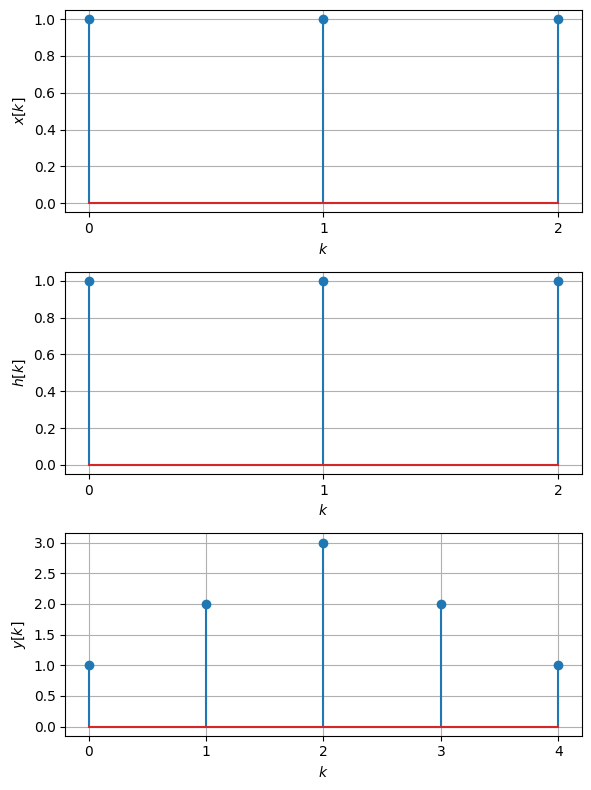

In [9]:
x = np.array([1, 1, 1])
h = np.array([1, 1, 1])
y = signal.convolve(x, h)

def plot_signal(signal, index, variable):
    ax=plt.subplot(3, 1, index)
    plt.stem(signal)
    plt.xlabel("$k$")
    plt.ylabel("$"+variable+"[k]$")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    plt.grid()

plt.figure(figsize=[6, 8])
plot_signal(signal=x, index=1, variable='x')
plot_signal(signal=h, index=2, variable='h')
plot_signal(signal=y, index=3, variable='y')
plt.tight_layout()

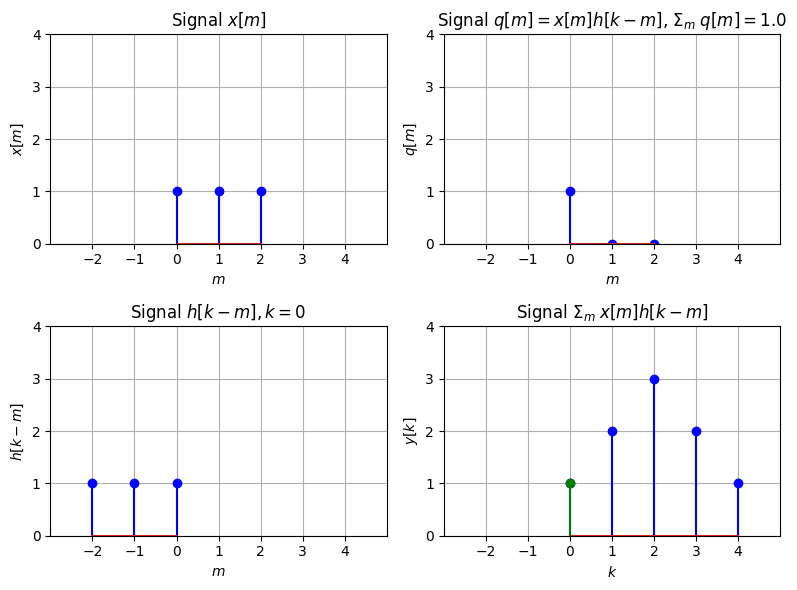

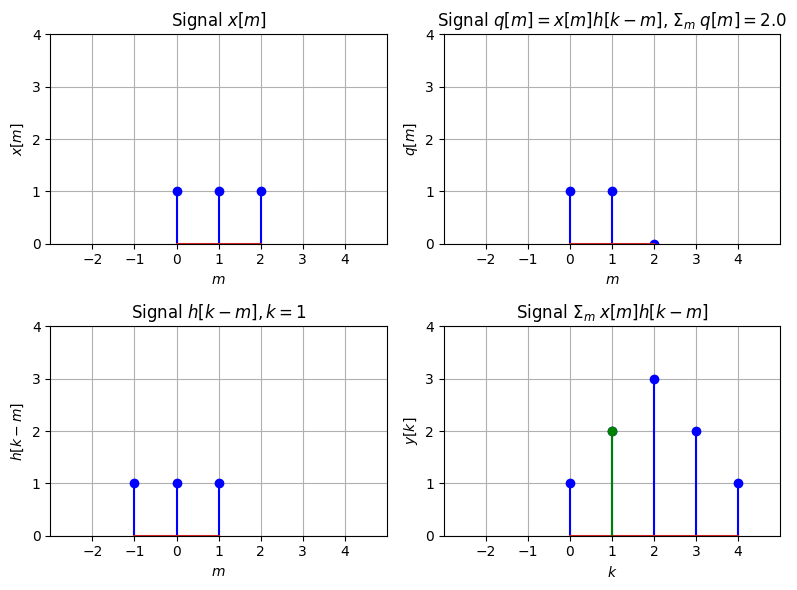

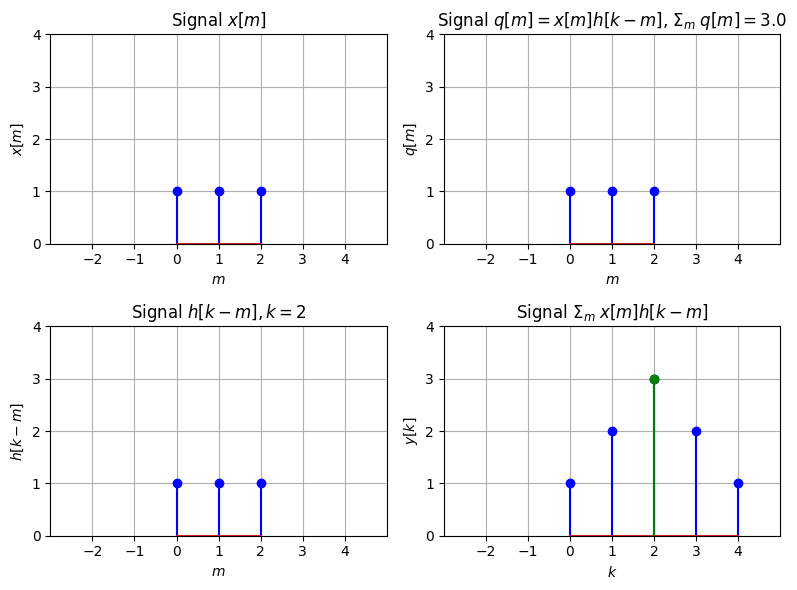

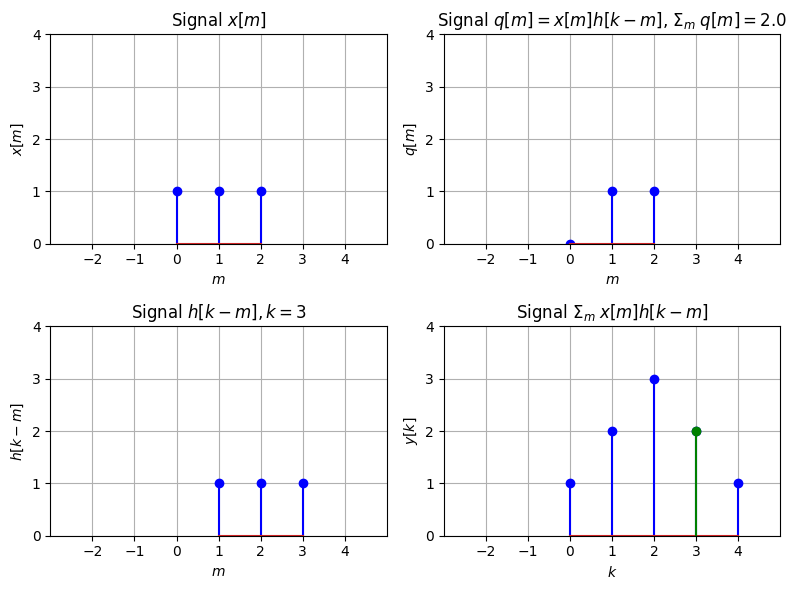

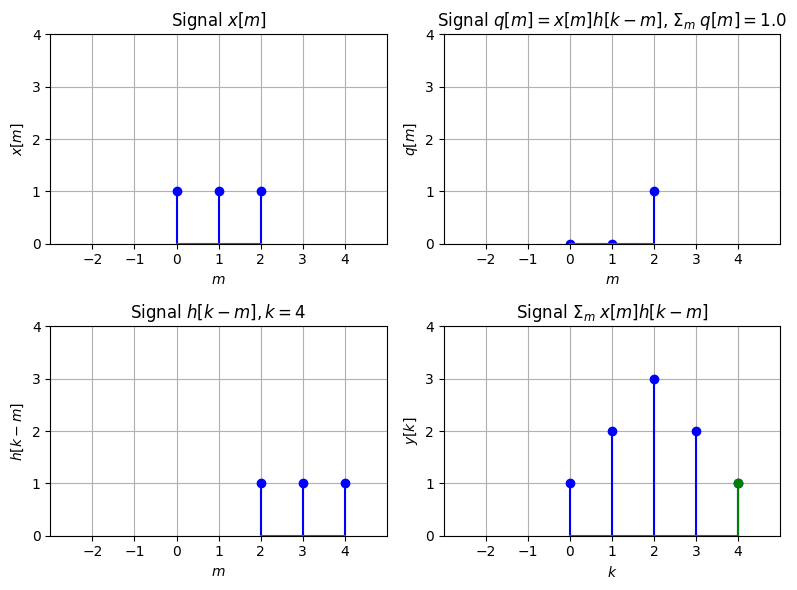

In [10]:
x = np.array([1, 1, 1])
h = np.array([1, 1, 1])
y = np.convolve(x, h)
def plot_settings():
    plt.xlim(-3, 5)
    plt.ylim(0, 3)
    plt.xticks(np.arange(-2, 5, 1))
    plt.yticks(np.arange(0, 5, 1))
    plt.grid()

for t in range(5):
    figure1=plt.figure(figsize=[8, 6])
    M = 1024
    l_step, r_step = -3, 5
    plt.subplot(2, 2, 1)
    plt.stem(np.arange(x.size), x, 'b', markerfmt='bo')
    plot_settings()
    plt.title("Signal $x[m]$");
    plt.xlabel("$m$");
    plt.ylabel("$x[m]$");

    w=h[::-1]
    q=np.zeros(x.size)
    for i in range(x.size):
        ind2 = (t - np.arange(h.size)[::-1])
        k = 0
        for qq in range(ind2.size):
            if ind2[qq] == i:
                k = 1
                break
        q[i] = x[i] * w[qq] * k

    plt.subplot(2, 2, 2)
    plt.stem(np.arange(q.size), q, 'b', markerfmt='bo')
    # plt.xticks(np.arange(0, x.size, max(1, x.size//5)))
    plot_settings()
    plt.title('Signal $q[m]=x[m]h[k-m]$, $\Sigma_m \; q[m]=%.1f$'
              %(sum(q)));
    plt.xlabel('$m$');
    plt.ylabel('$q[m]$');

    plt.subplot(2, 2, 3)
    plt.stem((t-np.arange(h.size)[::-1]), h[::-1], 'b', markerfmt='bo')
    plot_settings()
    plt.title('Signal $h[k-m], k=%i$' %(t));
    plt.xlabel('$m$');
    plt.ylabel('$h[k-m]$');

    plt.subplot(2, 2, 4)
    plt.stem(np.arange(y.size), y, 'b', markerfmt='bo')
    plt.stem([t], [sum(q)], 'g', markerfmt='go')
    plot_settings()
    plt.title('Signal $\Sigma_m \; x[m]h[k-m]$');
    plt.xlabel('$k$');
    plt.ylabel('$y[k]$');
    plt.tight_layout()
    plt.show()


## Эффективное вычисление свертки c помощью БПФ

По свойствам ДПФ если $x[k] \overset{\text{ДПФ}}\longleftrightarrow  X[n]$ и $h[k] \overset{\text{ДПФ}}\longleftrightarrow  H[n]$, то 
$$\sum\limits_{m=0}^{N-1}{x[m]h{{[k-m]}_{N}}} \overset{\text{ДПФ}}\longleftrightarrow  X[n]H[n].$$

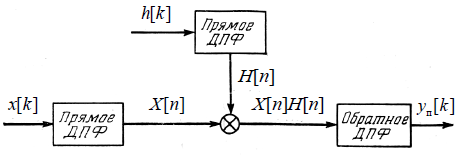

Последовательность отсчетов
$$y_п[k] = \sum\limits_{m=0}^{N-1}{x[m]h{{[k-m]}_{N}}}$$
является циклической сверткой последовательностей $x[k]$ и $h[k]$.

Пусть сигналы $x[k]$ и $h[k]$ начинаются с отсчета при $k=0$ и имеет длины $N_1$ и $N_2$ отсчетов соотвественно. Число отсчетов их линейной дискретной свертки не превышает $N_1+N_2-1$. 

Если взять размерность ДПФ $N=N_1+N_2-1$, то один период циклической свертки этих последовательностей совпадает с их линейной сверткой. Тогда вычисление линейной свертки можно вести по следующему алгоритму:

1) Найти $X[n]$ — ДПФ последовательности $x[k]$.

2) Найти $H[n]$ — ДПФ последовательности $h[k]$.

3) Вычислить $Y[n]=X[n]H[n]$.

4) Вычислить обратное ДПФ для  $Y[n]$.

### Пример 3. Вычисление сверки с помощью БПФ

In [11]:
x = np.array([-2, 1, 2, -1])
h = np.array([-1, 1, 2])
y = signal.convolve(x, h)
y

array([ 2, -3, -5,  5,  3, -2])

In [12]:
N = x.size + h.size -1
N

6

In [13]:
X = np.fft.fft(x, N)
H = np.fft.fft(h, N)
Y = X * H
y = np.fft.ifft(Y, N)
y

array([ 2.-8.2173011e-33j, -3.+8.2173011e-33j, -5.-8.2173011e-33j,
        5.+8.2173011e-33j,  3.-8.2173011e-33j, -2.+8.2173011e-33j])

In [14]:
y.real

array([ 2., -3., -5.,  5.,  3., -2.])

Выбор `method='fft'` соотвествует эффективному вычислению свертки с помощью быстрого преобразования Фурье. 

In [15]:
signal.convolve(x, h, method='fft')

array([ 2, -3, -5,  5,  3, -2])

### Пример 4. Последовательности большой длительности. 

In [17]:
N= 2 ** 19
x = np.random.normal(0, 0.1, N)
h = np.random.normal(0, 0.1, N)
N

524288

In [19]:
start = time.time()
y = signal.convolve(x, h, method='fft')
time2=time.time()
print(time2 - start, "c")

0.12332272529602051 c


Сравним время работы программы для алгоритма с использованием БПФ и для прямого алгоритма вычисления свертки. 

In [20]:
start=time.time()
signal.convolve(x, h, method='fft')
time2=time.time()
print(time2-start, "c")

0.11523103713989258 c


In [21]:
start=time.time()
signal.convolve(x, h, method='direct')
time2=time.time()
print(time2-start, "c")

54.94647717475891 c


## Свойства линейной дискретной свертки

По теореме о свертке во временной области для ДВПФ если  $x[k]\overset{\text{ДВПФ}}\longleftrightarrow X(\nu)$ и  $h[k]\overset{\text{ДВПФ}}\longleftrightarrow H(\nu)$, то
\begin{equation}
\sum_{m=-\infty}^\infty x[m]h[k-m]\overset{\text{ДВПФ}}\longleftrightarrow  X(\nu)H(\nu).
\end{equation}
В левой части стоит дискретная свертка сигналов, в правой — произведение спектров.


Из этой теоремы становится очевидным, что для абсолютно суммируемых поледовательностей линейная дискретная сверка будет обладать следующими свойствами:

* линейность
$ (\alpha x_1[k] + \beta x_2[k]) \otimes h[k] =
\alpha x_1[k]\otimes h[k] + \beta x_2[k] \otimes h[k]$

* коммунитативность 
$x[k] \otimes h[k] = h[k] \otimes x[k] $

* ассоциативность  
$(x[k] \otimes h_1[k] )\otimes h_2[k]  = x[k] \otimes (h_1[k] \otimes h_2[k])  $

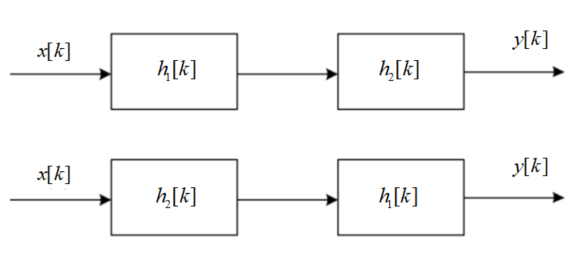

Из свойств свертки, в частности, следует, что с точности до разницы, связанной с конечным числом разрядов, при перестановке порядка следования фильтров выход системы не изменяется. 